MSE: 6.4752
最终的损失: 6.475218425531886
score 0.8842091819174255


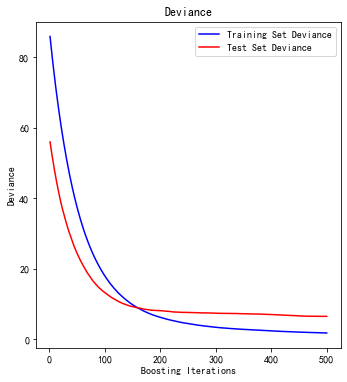

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

boston = datasets.load_boston()  # 波士顿房价数据集
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}  # GBDT算法所用的损失函数(默认loss='ls',可选参数有:ls;lad;huber;quantile)
clf = ensemble.GradientBoostingRegressor(**params)  # 打包参数

clf.fit(X_train, y_train)  # fit函数第一个参数的shape必须满足(n_samples, n_features)
mse = mean_squared_error(y_test, clf.predict(X_test))  # 均方误差
print("MSE: %.4f" % mse)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):  # 不同数量的树组合时,对X_test的预测预测
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1,
         clf.train_score_,  # 不同数量的树进行组合时训练数据集的score
         'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

print('最终的损失:', clf.loss_(clf.predict(X_test), y_test))  # 该模型所用的损失函数
print('score', clf.score(X_test, y_test))  # R^2

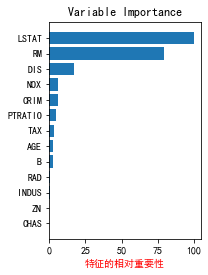

In [2]:
feature_importance = clf.feature_importances_  # 特征的相对重要性(值越大,重要程度越高)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('特征的相对重要性', color='red')
plt.title('Variable Importance')
plt.show()